In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    "Compute r."
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

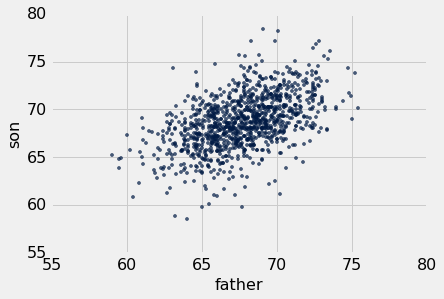

In [7]:
heights = Table.read_table('heights.csv')
heights.scatter('father', 'son', s=10)

In [5]:
heights.num_rows

1078

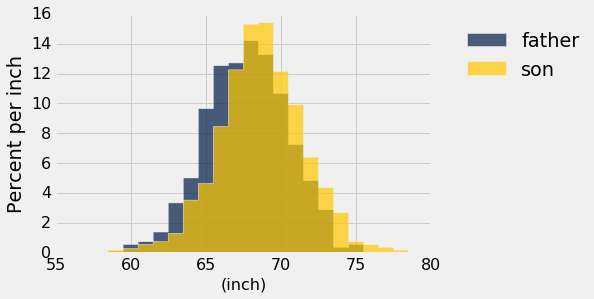

In [8]:
heights.hist(bins=np.arange(55.5, 80, 1), unit='inch')

In [20]:
son_average = np.mean(heights.column('son'))
father_average = np.mean(heights.column('father'))
son_average - father_average

0.99740259740261195

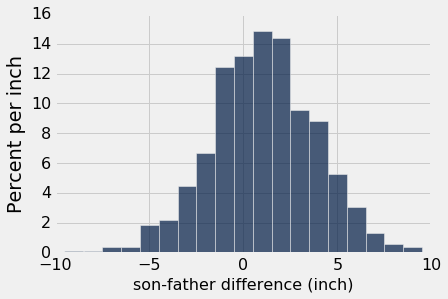

In [12]:
diffs = Table().with_column('son-father difference',
    heights.column('son') - heights.column('father'))
diffs.hist(bins=np.arange(-9.5, 10, 1), unit='inch')

In [13]:
r = correlation(heights, 'father', 'son')
r

0.50116268080759108

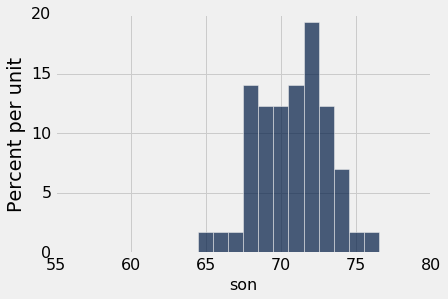

In [14]:
six_foot_fathers = heights.where(np.round(heights.column('father')) == 72)
six_foot_fathers.hist('son', bins=np.arange(55.5, 80, 1))

In [15]:
np.count_nonzero(six_foot_fathers.column('son') < 72) / six_foot_fathers.num_rows

0.6842105263157895

In [16]:
np.mean(six_foot_fathers.column('son'))

70.728070175438603

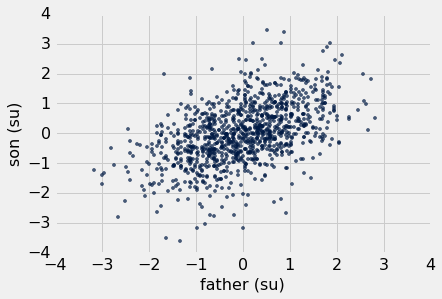

In [19]:
father_su = standard_units(heights['father'])
son_su = standard_units(heights['son'])
heights_su = Table().with_columns([
        'father (su)', father_su,
        'son (su)', son_su
    ])
heights_su.scatter('father (su)', s=10)

In [23]:
(72-father_average)/np.std(heights.column('father'))

1.5715390503947599

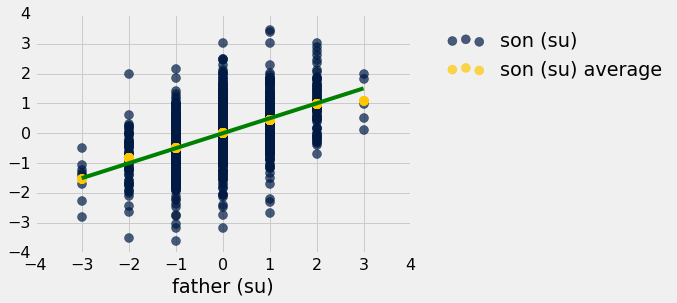

In [30]:
rounded = heights_su.with_column('father (su)', np.round(father_su))
rounded.join('father (su)', rounded.group(0, np.average)).scatter(0, s=80)

import matplotlib.pyplot as plots
plots.plot([-3, 3], [-3 * r, 3 * r], color='g')

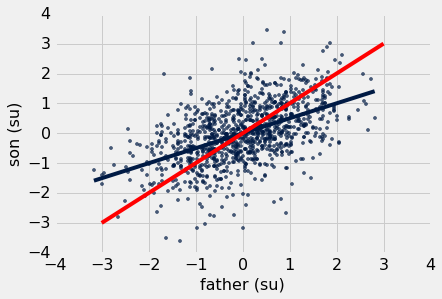

In [35]:
heights_su.scatter('father (su)', s=10, fit_line=True)
# plots.plot([-3, 3], [-3 * r, 3 * r], color='g')
plots.plot([-3, 3], [-3, 3], color='r')

In [38]:
(r * 1.57) * np.std(heights.column('son')) + son_average

70.899055080041094

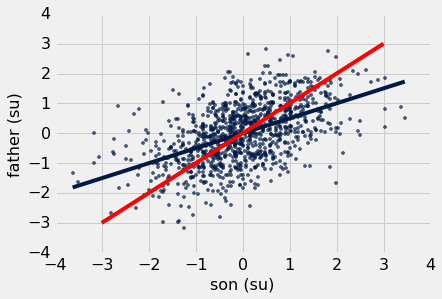

In [41]:
heights_su.scatter('son (su)', s=10, fit_line=True)
plots.plot([-3, 3], [-3, 3], color='r')

## Discussion

In [45]:
x = 90
x_su = (x-70)/10
y_su = 0.75 * x_su
y_su * 12 + 50

68.0

In [48]:
x = 60
x_su = (x-70)/10
y_su = 0.75 * x_su
y_su * 12 + 50

41.0

In [49]:
68-41

27

## Slope & Intercept

In [50]:
def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

[slope(heights, 'father', 'son'), intercept(heights, 'father', 'son')]

[0.51400591254559247, 33.892800540661682]

In [51]:
correlation(heights, 'father', 'son')

0.50116268080759108

In [52]:
def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

fitted = heights.with_column('son (fitted)', fit(heights, 'father', 'son'))
fitted

father,son,son (fitted)
65,59.8,67.3032
63.3,63.2,66.4294
65,63.3,67.3032
65.8,62.8,67.7144
61.1,64.3,65.2986
63,64.2,66.2752
65.4,64.1,67.5088
64.7,64,67.149
66.1,64.6,67.8686
67,64,68.3312


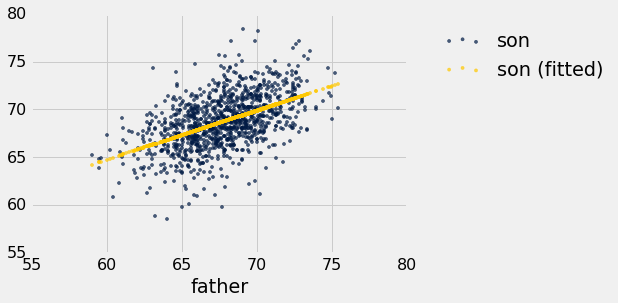

In [56]:
fitted.scatter(0, s=10)

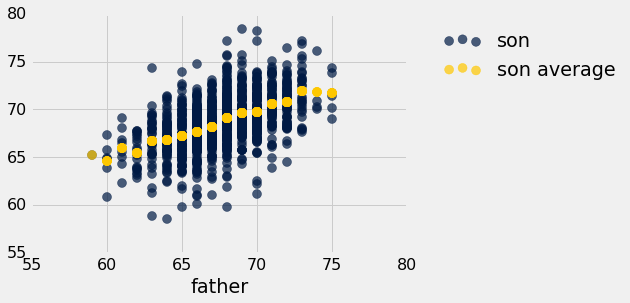

In [62]:
rounded = heights.with_column('father', np.round(heights.column('father')))
rounded.join('father', rounded.group(0, np.average)).scatter(0, s=80)


## Residuals

In [63]:
res = fitted.with_column('residual', fitted.column('son') - fitted.column('son (fitted)'))
res

father,son,son (fitted),residual
65,59.8,67.3032,-7.50318
63.3,63.2,66.4294,-3.22937
65,63.3,67.3032,-4.00318
65.8,62.8,67.7144,-4.91439
61.1,64.3,65.2986,-0.998562
63,64.2,66.2752,-2.07517
65.4,64.1,67.5088,-3.40879
64.7,64,67.149,-3.14898
66.1,64.6,67.8686,-3.26859
67,64,68.3312,-4.3312


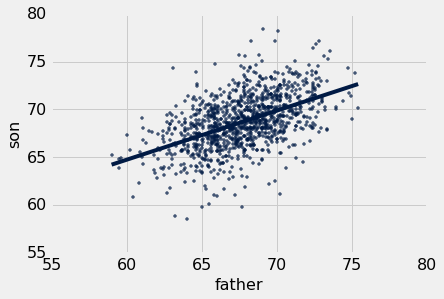

In [64]:
heights.scatter('father', 'son', fit_line=True, s=8)

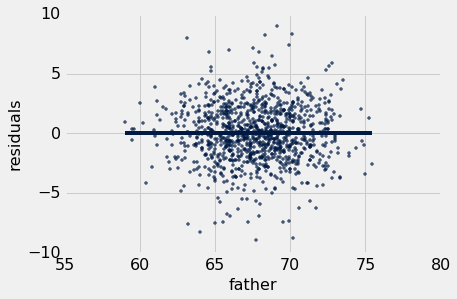

In [65]:
def residual_plot(table, x, y):
    """Plot the residuals (errors) of regression."""
    residuals = table.column(y) - fit(table, x, y)
    table.select(x).with_column('residuals', residuals).scatter(x, fit_line=True, s=8)
    
residual_plot(heights, 'father', 'son')

In [67]:
sat2014 = Table.read_table('sat2014.csv')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
South Dakota,2.9,604,609,579,1792
Minnesota,5.9,598,610,578,1786
Michigan,3.8,593,610,581,1784
Wisconsin,3.9,596,608,578,1782
Missouri,4.2,595,597,579,1771
Wyoming,3.3,590,599,573,1762
Kansas,5.3,591,596,566,1753


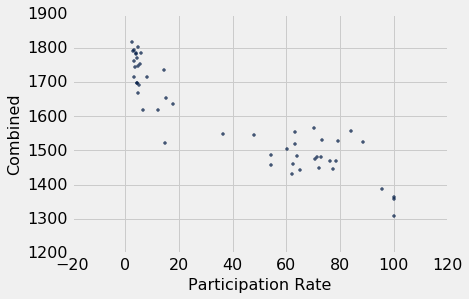

In [68]:
sat2014.scatter('Participation Rate', 'Combined', s=8)

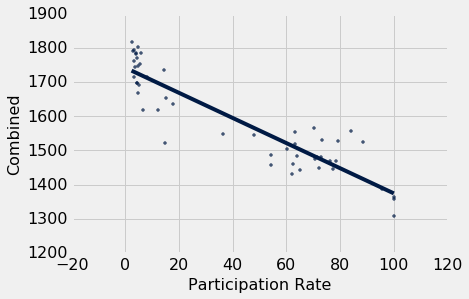

In [69]:
sat2014.scatter('Participation Rate', 'Combined', s=8, fit_line=True)

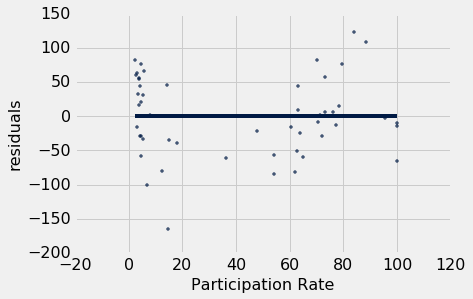

In [70]:
residual_plot(sat2014, 'Participation Rate', 'Combined')